In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [32]:
n_tot = 10000
sigma_y = .2
L = 20
r_correct = []
r_low = []
r_high = []
def generate(posterior):
    cum_posterior = np.cumsum(posterior, axis=0, )
    cum_posterior = cum_posterior/max(cum_posterior)
    u = np.random.random(L)
    theta_posterior = np.interp(u, cum_posterior, theta_axis, left=0, right=1)
    return theta_posterior
def model(theta):
    return 3*theta**2
def posterior(theta, y, sigma): 
    return np.exp(-(y-model(theta))**2/(2*sigma**2))
for i in range(n_tot):
    theta_prior = np.random.random(1)[0]
    y_likelihood = (sigma_y) * np.random.randn(1)[0] + model(theta_prior)
    theta_axis = np.linspace(0, 1, 1000)
    posterior_low = posterior(theta_axis, y_likelihood, .1)
    posterior_high = posterior(theta_axis, y_likelihood, .3)
    posterior_correct = posterior(theta_axis, y_likelihood, .2)
    theta_posterior_low = generate(posterior_low)
    theta_posterior_high = generate(posterior_high)
    theta_posterior_correct = generate(posterior_correct)
    r_low.append(np.sum(theta_posterior_low <= theta_prior))
    r_high.append(np.sum(theta_posterior_high <= theta_prior))
    r_correct.append(np.sum(theta_posterior_correct <= theta_prior))

/tmp/ipykernel_28577/2477031199.py:4: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values " ". Passing invalid values is deprecated since 3.4 and will become an error in 3.8.
  plt.bar(i, len(np.array(r_high)[np.array(r_high) == i]), color = 'c',hatch=' ',edgecolor='k')
/tmp/ipykernel_28577/2477031199.py:15: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values " ". Passing invalid values is deprecated since 3.4 and will become an error in 3.8.
  plt.bar(i, len(np.array(r_low)[np.array(r_low) == i]), color = 'c',hatch=' ',edgecolor='k')


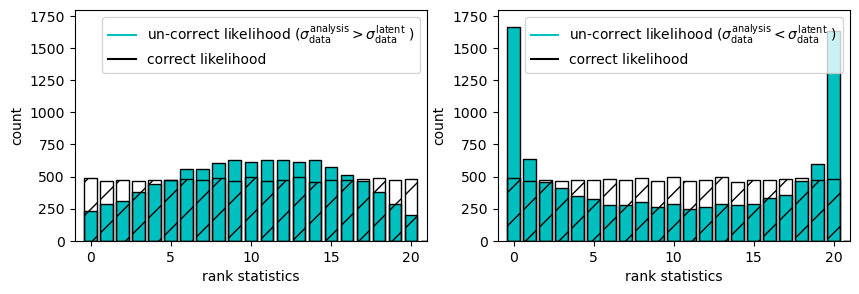

In [33]:
plt.figure(figsize=(10, 3))
plt.subplot(121)
for i in range(22):
    plt.bar(i, len(np.array(r_high)[np.array(r_high) == i]), color = 'c',hatch=' ',edgecolor='k')
    plt.bar(i, len(np.array(r_correct)[np.array(r_correct) == i]),  hatch='/', color='none',edgecolor='k')
plt.plot([], [], '-c', label = r'un-correct likelihood ($\sigma_{\rm data}^{\rm analysis} > \sigma_{\rm data}^{\rm latent}$ )')
plt.plot([], [], '-k', label = 'correct likelihood')
plt.legend()
plt.ylim(0, 1800)
plt.xlim(-1, 21)
plt.xlabel('rank statistics')
plt.ylabel('count')
plt.subplot(122)
for i in range(22):
    plt.bar(i, len(np.array(r_low)[np.array(r_low) == i]), color = 'c',hatch=' ',edgecolor='k')
    plt.bar(i, len(np.array(r_correct)[np.array(r_correct) == i]),  hatch='/', color='none',edgecolor='k')
plt.plot([], [], '-c', label = r'un-correct likelihood ($\sigma_{\rm data}^{\rm analysis} < \sigma_{\rm data}^{\rm latent}$ )')
plt.plot([], [], '-k', label = 'correct likelihood')
plt.legend()
plt.ylim(0, 1800)
plt.xlim(-1, 21)
plt.ylabel('count')
plt.xlabel('rank statistics')
plt.savefig(f'rank_statistics.png', bbox_inches='tight', dpi=100)